I will investigate the **mushroom dataset** in order to build models able to identify poisonous and edible mushrooms.

In [52]:
library(caret)
library(randomForest)
library(caTools)
library(rpart)
library(rpart.plot)
library(ggplot2)
library(readr)
mushrooms <- read.csv("../input/mushrooms.csv")
summary(mushrooms)
str(mushrooms)

 class    cap.shape cap.surface   cap.color    bruises       odor     
 e:4208   b: 452    f:2320      n      :2284   f:4748   n      :3528  
 p:3916   c:   4    g:   4      g      :1840   t:3376   f      :2160  
          f:3152    s:2556      e      :1500            s      : 576  
          k: 828    y:3244      y      :1072            y      : 576  
          s:  32                w      :1040            a      : 400  
          x:3656                b      : 168            l      : 400  
                                (Other): 220            (Other): 484  
 gill.attachment gill.spacing gill.size   gill.color   stalk.shape stalk.root
 a: 210          c:6812       b:5612    b      :1728   e:3516      ?:2480    
 f:7914          w:1312       n:2512    p      :1492   t:4608      b:3776    
                                        w      :1202               c: 556    
                                        n      :1048               e:1120    
                                        g 

'data.frame':	8124 obs. of  23 variables:
 $ class                   : Factor w/ 2 levels "e","p": 2 1 1 2 1 1 1 1 2 1 ...
 $ cap.shape               : Factor w/ 6 levels "b","c","f","k",..: 6 6 1 6 6 6 1 1 6 1 ...
 $ cap.surface             : Factor w/ 4 levels "f","g","s","y": 3 3 3 4 3 4 3 4 4 3 ...
 $ cap.color               : Factor w/ 10 levels "b","c","e","g",..: 5 10 9 9 4 10 9 9 9 10 ...
 $ bruises                 : Factor w/ 2 levels "f","t": 2 2 2 2 1 2 2 2 2 2 ...
 $ odor                    : Factor w/ 9 levels "a","c","f","l",..: 7 1 4 7 6 1 1 4 7 1 ...
 $ gill.attachment         : Factor w/ 2 levels "a","f": 2 2 2 2 2 2 2 2 2 2 ...
 $ gill.spacing            : Factor w/ 2 levels "c","w": 1 1 1 1 2 1 1 1 1 1 ...
 $ gill.size               : Factor w/ 2 levels "b","n": 2 1 1 2 1 1 1 1 2 1 ...
 $ gill.color              : Factor w/ 12 levels "b","e","g","h",..: 5 5 6 6 5 6 3 6 8 3 ...
 $ stalk.shape             : Factor w/ 2 levels "e","t": 1 1 1 1 2 1 1 1 1 1 ...
 $ stalk.r

**Variable veil.type** *has just 1 unique value.
So, it is better to remove that variable from the data itself.
In order to improve the performance of our models*

In [53]:
mushrooms$veil.type <- NULL
str(mushrooms)
sapply(mushrooms, class)

'data.frame':	8124 obs. of  22 variables:
 $ class                   : Factor w/ 2 levels "e","p": 2 1 1 2 1 1 1 1 2 1 ...
 $ cap.shape               : Factor w/ 6 levels "b","c","f","k",..: 6 6 1 6 6 6 1 1 6 1 ...
 $ cap.surface             : Factor w/ 4 levels "f","g","s","y": 3 3 3 4 3 4 3 4 4 3 ...
 $ cap.color               : Factor w/ 10 levels "b","c","e","g",..: 5 10 9 9 4 10 9 9 9 10 ...
 $ bruises                 : Factor w/ 2 levels "f","t": 2 2 2 2 1 2 2 2 2 2 ...
 $ odor                    : Factor w/ 9 levels "a","c","f","l",..: 7 1 4 7 6 1 1 4 7 1 ...
 $ gill.attachment         : Factor w/ 2 levels "a","f": 2 2 2 2 2 2 2 2 2 2 ...
 $ gill.spacing            : Factor w/ 2 levels "c","w": 1 1 1 1 2 1 1 1 1 1 ...
 $ gill.size               : Factor w/ 2 levels "b","n": 2 1 1 2 1 1 1 1 2 1 ...
 $ gill.color              : Factor w/ 12 levels "b","e","g","h",..: 5 5 6 6 5 6 3 6 8 3 ...
 $ stalk.shape             : Factor w/ 2 levels "e","t": 1 1 1 1 2 1 1 1 1 1 ...
 $ stalk.r

class                cap.shape              cap.surface 
                "factor"                 "factor"                 "factor" 
               cap.color                  bruises                     odor 
                "factor"                 "factor"                 "factor" 
         gill.attachment             gill.spacing                gill.size 
                "factor"                 "factor"                 "factor" 
              gill.color              stalk.shape               stalk.root 
                "factor"                 "factor"                 "factor" 
stalk.surface.above.ring stalk.surface.below.ring   stalk.color.above.ring 
                "factor"                 "factor"                 "factor" 
  stalk.color.below.ring               veil.color              ring.number 
                "factor"                 "factor"                 "factor" 
               ring.type        spore.print.color               population 
                "factor"                 "factor"                 "factor" 
                 habitat 
                "factor"

**Visualizations** to understand the link between a predictor and a target variable

**Stacked Bar chart ** to understand a clear relation between the target variable and some predictors

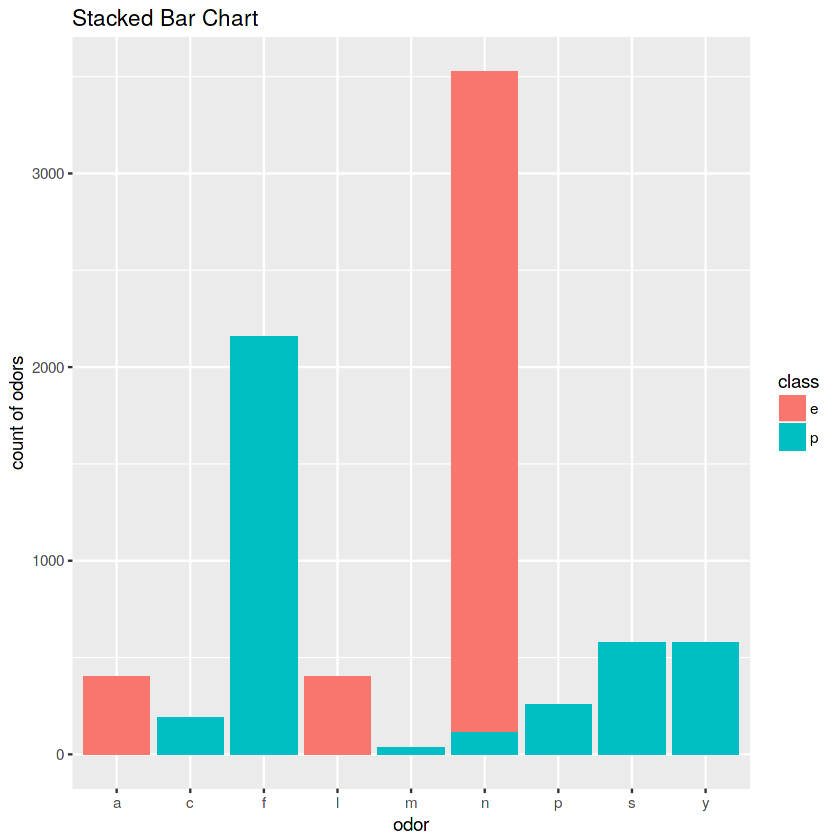

In [54]:
ggplot(mushrooms, aes(`odor`, fill = `class`)) + geom_bar() + labs(title =
                    "Stacked Bar Chart", x = "odor" , y = "count of odors"  )

As a whole when we can see an interesting link between a *predictor variable odor* and *target variable class:*

* When odor value is 'c', 'f', 'm', 'p', 's', 'y', then target variable class is p (**poisionous**)
* When odor value is 'a', 'l', then target variable class is e (**edible**)
* When odor value is 'n', then target variable class can be p or e.

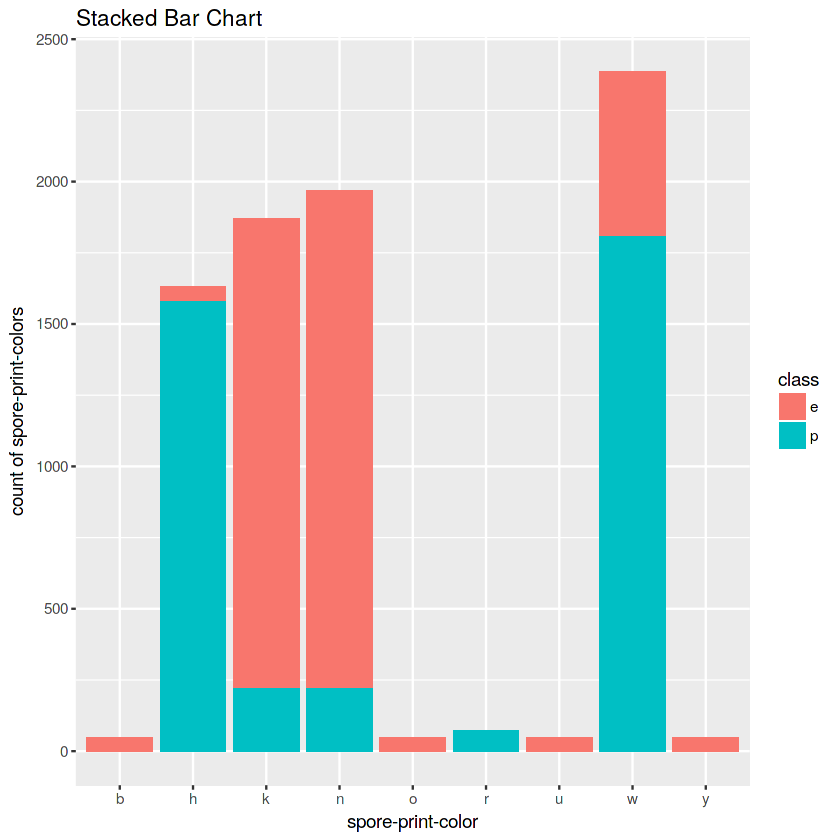

In [55]:
ggplot(mushrooms, aes(`spore.print.color`, fill = `class`)) + geom_bar() + labs(title =
                    "Stacked Bar Chart", x = "spore-print-color" , y = "count of spore-print-colors"  )

We can clearly visualise how the **variable 'spore-print-color'** varies with the** target variable class**

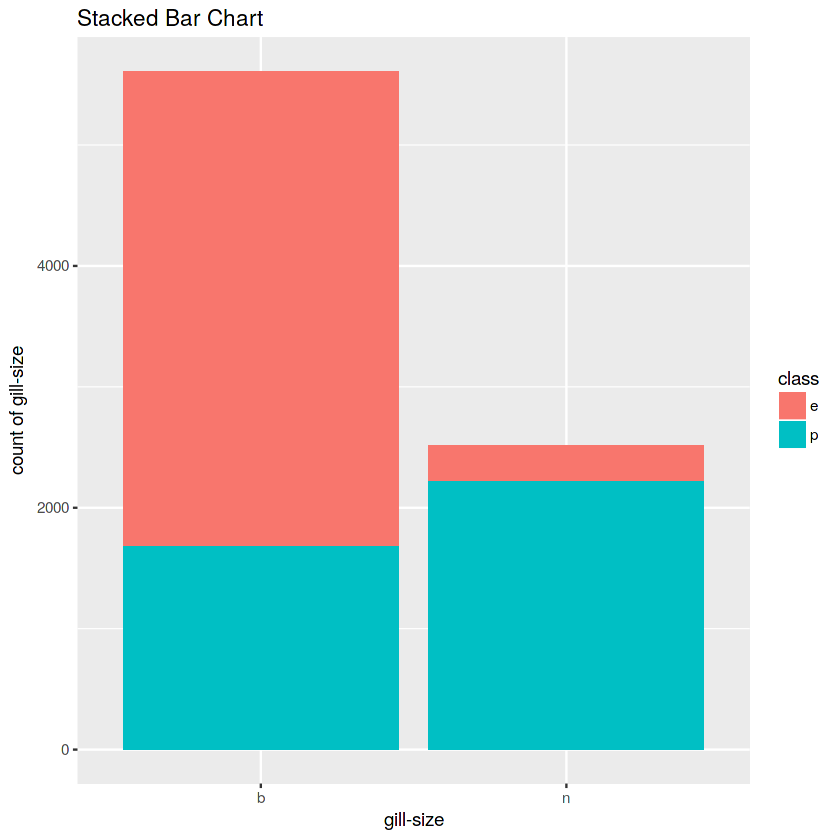

In [56]:
ggplot(mushrooms, aes(`gill.size`, fill = `class`)) + geom_bar() + labs(title =
                            "Stacked Bar Chart", x = "gill-size" , y = "count of gill-size"  )

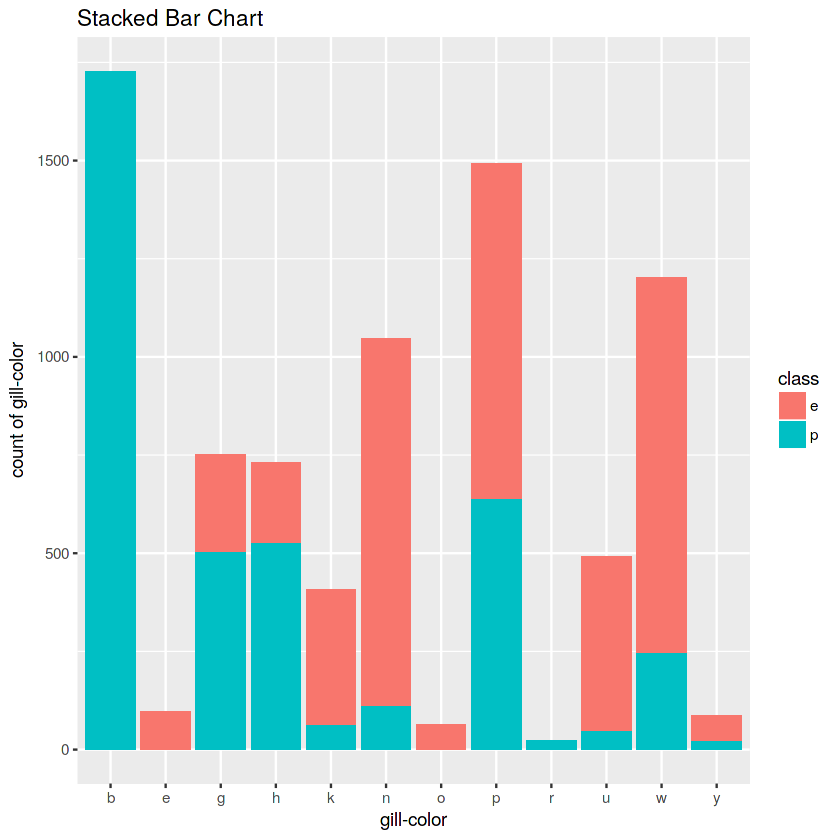

In [57]:
ggplot(mushrooms, aes(`gill.color`, fill = `class`)) + geom_bar() + labs(title =
                     "Stacked Bar Chart", x = "gill-color" , y = "count of gill-color"  )

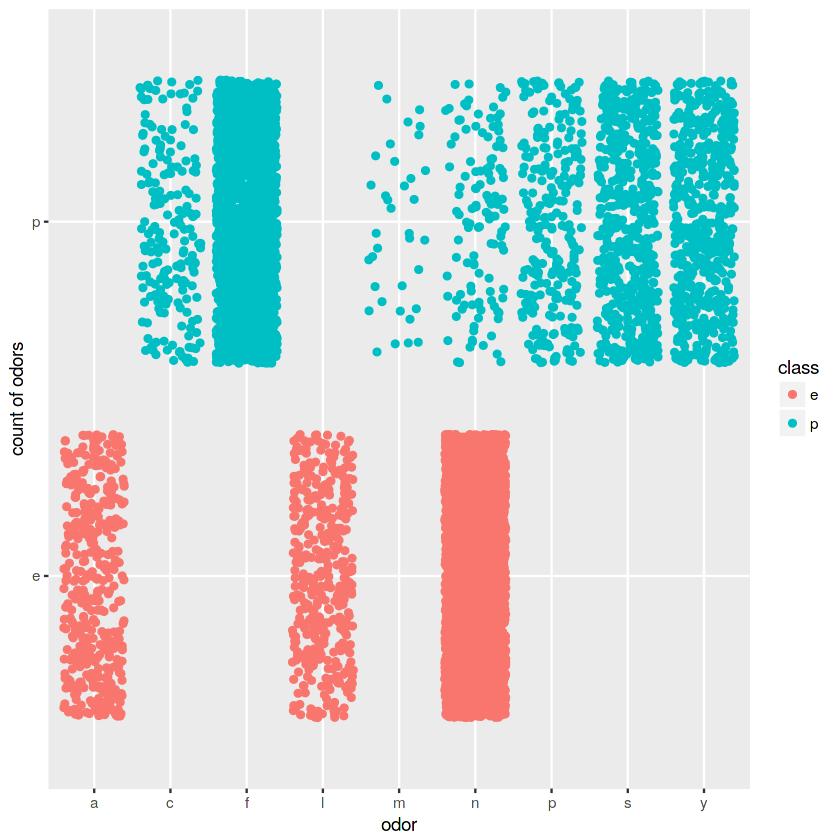

In [58]:
ggplot(mushrooms, aes(x= `odor`, y= `class`, fill = `class`, color = `class`))  + geom_jitter() + 
labs(x = "odor" , y = "count of odors"  )

Adding a new specification to the previous ggplot version with **geom_jitter()** gives a scattered version of link between **variable odor** and **target variable class**

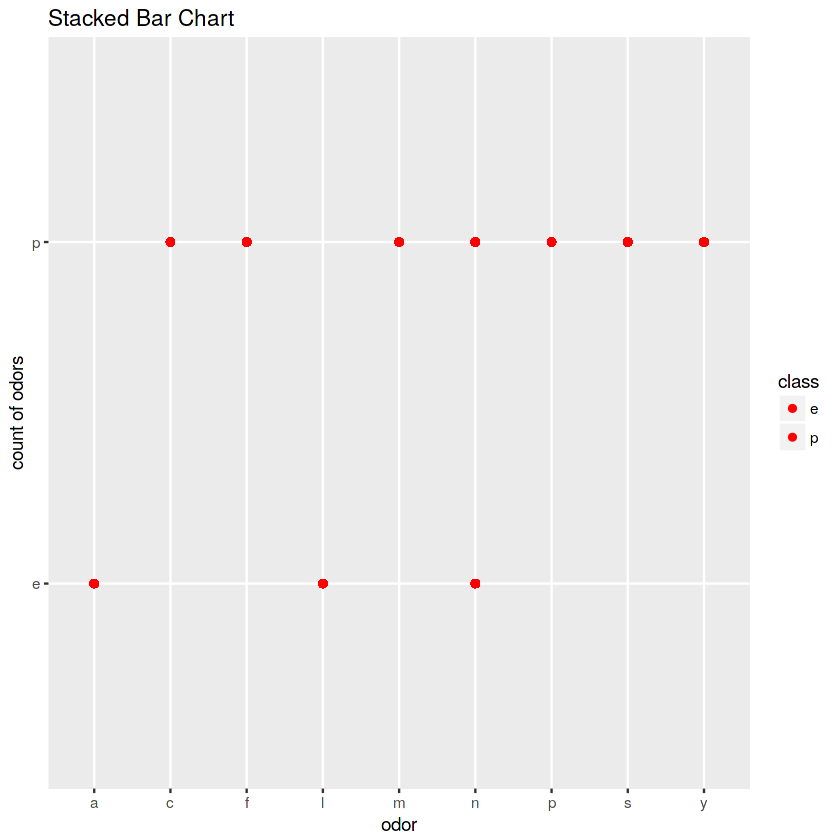

In [59]:
ggplot(mushrooms, aes(`odor`, fill = `class`, y = `class`)) + geom_point(col = 'red') + labs(title =
                                  "Stacked Bar Chart", x = "odor" , y = "count of odors"  )


**Again**, adding a new specification to the previous ggplot version with **geom_point()** gives a different version of link between **variable odor** and **target variable class**

**Let us start the modelling process**

 **Caret arrives****

To start with, lets create 70:30 stratified split using caret between Train and Test.

In [60]:
set.seed(101) 
sample = sample.split(mushrooms$class, SplitRatio = .7)
x_train = subset(mushrooms, sample == TRUE)
x_test = subset(mushrooms, sample == FALSE)
y_train<-x_train$class
y_test <- x_test$class
x_train$class<-NULL
x_test$class<-NULL

Firstly, I kept all my* predictor variables *and target variables in **categorical form**.

Now, here I converted all of my *predictor categorical variable* into **numeric form** and keeping the *target variable* in **categorical form**

In [61]:
mush1 <- mushrooms
str(mush1)
mush1$class<-ifelse(mush1$class=='p',0,1)
str(mush1)
clas <- mush1$class
mush1$class <- NULL
str(mush1)
dmy <- dummyVars(" ~ .", data = mush1, fullRank = T)
mush11 <- data.frame(predict(dmy, newdata = mush1))
str(mush11)
mush11$class <- clas
mush11$class[mush11$class==0] <- 'p'
mush11$class[mush11$class==1] <- 'e'
class(mush11$class)
mush11$class <- as.factor(mush11$class)
class(mush11$class)
str(mush11)

'data.frame':	8124 obs. of  22 variables:
 $ class                   : Factor w/ 2 levels "e","p": 2 1 1 2 1 1 1 1 2 1 ...
 $ cap.shape               : Factor w/ 6 levels "b","c","f","k",..: 6 6 1 6 6 6 1 1 6 1 ...
 $ cap.surface             : Factor w/ 4 levels "f","g","s","y": 3 3 3 4 3 4 3 4 4 3 ...
 $ cap.color               : Factor w/ 10 levels "b","c","e","g",..: 5 10 9 9 4 10 9 9 9 10 ...
 $ bruises                 : Factor w/ 2 levels "f","t": 2 2 2 2 1 2 2 2 2 2 ...
 $ odor                    : Factor w/ 9 levels "a","c","f","l",..: 7 1 4 7 6 1 1 4 7 1 ...
 $ gill.attachment         : Factor w/ 2 levels "a","f": 2 2 2 2 2 2 2 2 2 2 ...
 $ gill.spacing            : Factor w/ 2 levels "c","w": 1 1 1 1 2 1 1 1 1 1 ...
 $ gill.size               : Factor w/ 2 levels "b","n": 2 1 1 2 1 1 1 1 2 1 ...
 $ gill.color              : Factor w/ 12 levels "b","e","g","h",..: 5 5 6 6 5 6 3 6 8 3 ...
 $ stalk.shape             : Factor w/ 2 levels "e","t": 1 1 1 1 2 1 1 1 1 1 ...
 $ stalk.r

[1] "character"

[1] "factor"

'data.frame':	8124 obs. of  96 variables:
 $ cap.shape.c               : num  0 0 0 0 0 0 0 0 0 0 ...
 $ cap.shape.f               : num  0 0 0 0 0 0 0 0 0 0 ...
 $ cap.shape.k               : num  0 0 0 0 0 0 0 0 0 0 ...
 $ cap.shape.s               : num  0 0 0 0 0 0 0 0 0 0 ...
 $ cap.shape.x               : num  1 1 0 1 1 1 0 0 1 0 ...
 $ cap.surface.g             : num  0 0 0 0 0 0 0 0 0 0 ...
 $ cap.surface.s             : num  1 1 1 0 1 0 1 0 0 1 ...
 $ cap.surface.y             : num  0 0 0 1 0 1 0 1 1 0 ...
 $ cap.color.c               : num  0 0 0 0 0 0 0 0 0 0 ...
 $ cap.color.e               : num  0 0 0 0 0 0 0 0 0 0 ...
 $ cap.color.g               : num  0 0 0 0 1 0 0 0 0 0 ...
 $ cap.color.n               : num  1 0 0 0 0 0 0 0 0 0 ...
 $ cap.color.p               : num  0 0 0 0 0 0 0 0 0 0 ...
 $ cap.color.r               : num  0 0 0 0 0 0 0 0 0 0 ...
 $ cap.color.u               : num  0 0 0 0 0 0 0 0 0 0 ...
 $ cap.color.w               : num  0 0 1 1 0 0 1 1 1 0 ..

Again, lets create 70:30 stratified split using caret between Train and Test.

In [62]:
set.seed(101) 
sample1 = sample.split(mush11$class, SplitRatio = .7)
x_train1 = subset(mush11, sample1 == TRUE)
x_test1 = subset(mush11, sample1 == FALSE)
y_train1<-x_train1$class
y_test1 <- x_test1$class
x_train1$class<-NULL
x_test1$class<-NULL
str(y_train1)


 Factor w/ 2 levels "e","p": 2 2 1 1 1 1 1 1 1 2 ...


**Power of caret package **

In [63]:
names(getModelInfo())

[1] "ada"                 "AdaBag"              "AdaBoost.M1"        
  [4] "adaboost"            "amdai"               "ANFIS"              
  [7] "avNNet"              "awnb"                "awtan"              
 [10] "bag"                 "bagEarth"            "bagEarthGCV"        
 [13] "bagFDA"              "bagFDAGCV"           "bam"                
 [16] "bartMachine"         "bayesglm"            "binda"              
 [19] "blackboost"          "blasso"              "blassoAveraged"     
 [22] "bridge"              "brnn"                "BstLm"              
 [25] "bstSm"               "bstTree"             "C5.0"               
 [28] "C5.0Cost"            "C5.0Rules"           "C5.0Tree"           
 [31] "cforest"             "chaid"               "CSimca"             
 [34] "ctree"               "ctree2"              "cubist"             
 [37] "dda"                 "deepboost"           "DENFIS"             
 [40] "dnn"                 "dwdLinear"           "dwdPoly"            
 [43] "dwdRadial"           "earth"               "elm"                
 [46] "enet"                "evtree"              "extraTrees"         
 [49] "fda"                 "FH.GBML"             "FIR.DM"             
 [52] "foba"                "FRBCS.CHI"           "FRBCS.W"            
 [55] "FS.HGD"              "gam"                 "gamboost"           
 [58] "gamLoess"            "gamSpline"           "gaussprLinear"      
 [61] "gaussprPoly"         "gaussprRadial"       "gbm_h2o"            
 [64] "gbm"                 "gcvEarth"            "GFS.FR.MOGUL"       
 [67] "GFS.GCCL"            "GFS.LT.RS"           "GFS.THRIFT"         
 [70] "glm.nb"              "glm"                 "glmboost"           
 [73] "glmnet_h2o"          "glmnet"              "glmStepAIC"         
 [76] "gpls"                "hda"                 "hdda"               
 [79] "hdrda"               "HYFIS"               "icr"                
 [82] "J48"                 "JRip"                "kernelpls"          
 [85] "kknn"                "knn"                 "krlsPoly"           
 [88] "krlsRadial"          "lars"                "lars2"              
 [91] "lasso"               "lda"                 "lda2"               
 [94] "leapBackward"        "leapForward"         "leapSeq"            
 [97] "Linda"               "lm"                  "lmStepAIC"          
[100] "LMT"                 "loclda"              "logicBag"           
[103] "LogitBoost"          "logreg"              "lssvmLinear"        
[106] "lssvmPoly"           "lssvmRadial"         "lvq"                
[109] "M5"                  "M5Rules"             "manb"               
[112] "mda"                 "Mlda"                "mlp"                
[115] "mlpKerasDecay"       "mlpKerasDecayCost"   "mlpKerasDropout"    
[118] "mlpKerasDropoutCost" "mlpML"               "mlpSGD"             
[121] "mlpWeightDecay"      "mlpWeightDecayML"    "monmlp"             
[124] "msaenet"             "multinom"            "mxnet"              
[127] "mxnetAdam"           "naive_bayes"         "nb"                 
[130] "nbDiscrete"          "nbSearch"            "neuralnet"          
[133] "nnet"                "nnls"                "nodeHarvest"        
[136] "null"                "OneR"                "ordinalNet"         
[139] "ORFlog"              "ORFpls"              "ORFridge"           
[142] "ORFsvm"              "ownn"                "pam"                
[145] "parRF"               "PART"                "partDSA"            
[148] "pcaNNet"             "pcr"                 "pda"                
[151] "pda2"                "penalized"           "PenalizedLDA"       
[154] "plr"                 "pls"                 "plsRglm"            
[157] "polr"                "ppr"                 "PRIM"               
[160] "protoclass"          "pythonKnnReg"        "qda"                
[163] "QdaCov"              "qrf"                 "qrnn"               
[166] "randomGLM"           "ranger"      

Lets also create a Train Control object for 10 fold CV repeated 2 times. This is important to make sure we do not over-fit the training data.


In [ ]:
# Create a stratified sample for repeated cv
cv_10_folds <- createMultiFolds(y_train, k=10, times =2)

#create a control object for repeated cv in caret
contrl <- trainControl (method = "repeatedcv", number = 10, repeats =2, index = cv_10_folds)

Confusion Matrix and Statistics

   
       e    p
  e 1262    0
  p    0 1175
                                     
               Accuracy : 1          
                 95% CI : (0.9985, 1)
    No Information Rate : 0.5178     
    P-Value [Acc > NIR] : < 2.2e-16  
                                     
                  Kappa : 1          
 Mcnemar's Test P-Value : NA         
                                     
            Sensitivity : 1.0000     
            Specificity : 1.0000     
         Pos Pred Value : 1.0000     
         Neg Pred Value : 1.0000     
             Prevalence : 0.5178     
         Detection Rate : 0.5178     
   Detection Prevalence : 0.5178     
      Balanced Accuracy : 1.0000     
                                     
       'Positive' Class : e          
                                     

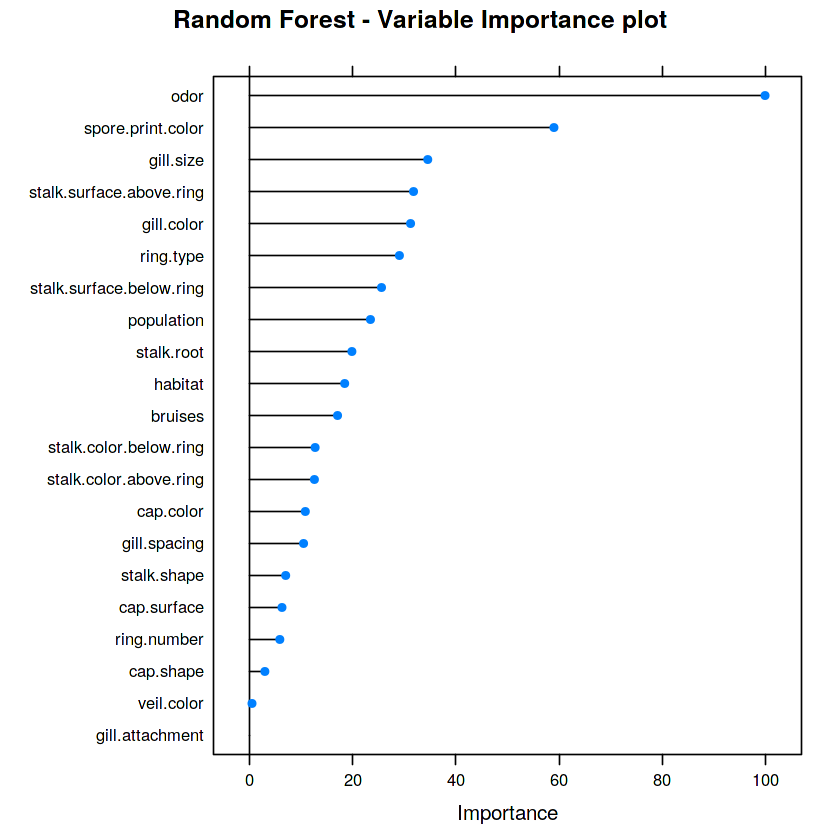

In [14]:
train_cv_1 <- train(x_train, y_train, method = "rf", trControl = contrl, tuneLength = 3)
plot(varImp(train_cv_1), main = "Random Forest - Variable Importance plot")
y_pred_1 <- predict(train_cv_1, x_test)
df1 <- data.frame (Original = y_test, Predicted = y_pred_1)
confusionMatrix(table(df1$Original, df1$Predicted))


Loading required package: survival

Attaching package: ‘survival’

The following object is masked from ‘package:caret’:

    cluster

Loading required package: splines
Loading required package: parallel
Loaded gbm 2.1.3


Confusion Matrix and Statistics

   
       e    p
  e 1262    0
  p    0 1175
                                     
               Accuracy : 1          
                 95% CI : (0.9985, 1)
    No Information Rate : 0.5178     
    P-Value [Acc > NIR] : < 2.2e-16  
                                     
                  Kappa : 1          
 Mcnemar's Test P-Value : NA         
                                     
            Sensitivity : 1.0000     
            Specificity : 1.0000     
         Pos Pred Value : 1.0000     
         Neg Pred Value : 1.0000     
             Prevalence : 0.5178     
         Detection Rate : 0.5178     
   Detection Prevalence : 0.5178     
      Balanced Accuracy : 1.0000     
                                     
       'Positive' Class : e          
                                     

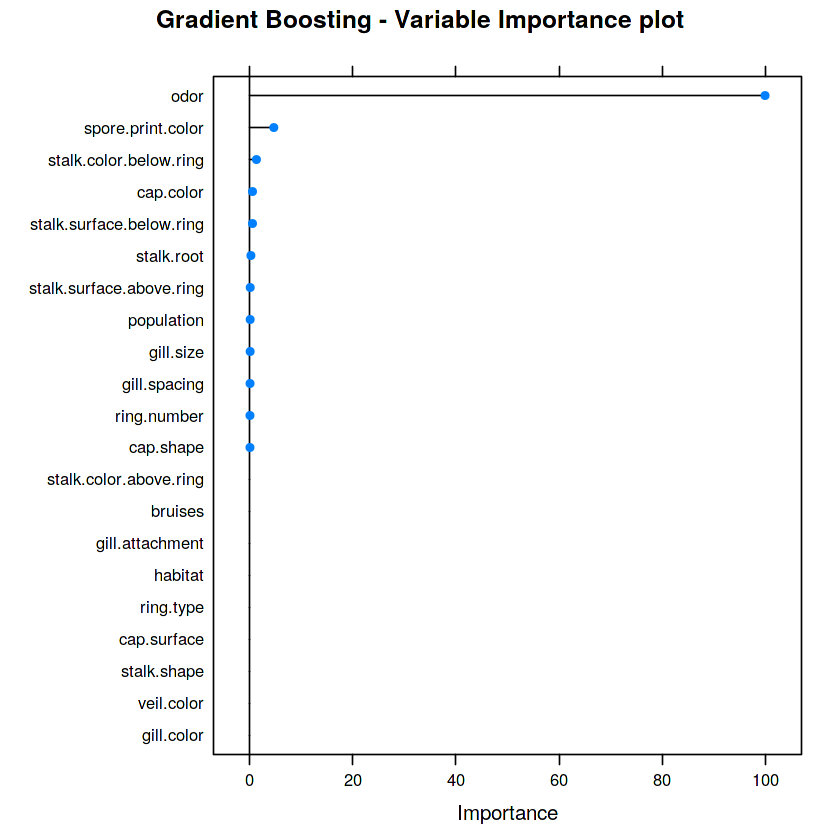

In [15]:
train_cv_2 <- train(x_train, y_train, method = "gbm", trControl = contrl, tuneLength = 3, verbose = FALSE)
plot(varImp(train_cv_2), main = "Gradient Boosting - Variable Importance plot")
y_pred_2 <- predict(train_cv_2, x_test)
df1 <- data.frame (Original = y_test, Predicted = y_pred_2)
confusionMatrix(table(df1$Original, df1$Predicted))

Confusion Matrix and Statistics

   
       e    p
  e 1262    0
  p    0 1175
                                     
               Accuracy : 1          
                 95% CI : (0.9985, 1)
    No Information Rate : 0.5178     
    P-Value [Acc > NIR] : < 2.2e-16  
                                     
                  Kappa : 1          
 Mcnemar's Test P-Value : NA         
                                     
            Sensitivity : 1.0000     
            Specificity : 1.0000     
         Pos Pred Value : 1.0000     
         Neg Pred Value : 1.0000     
             Prevalence : 0.5178     
         Detection Rate : 0.5178     
   Detection Prevalence : 0.5178     
      Balanced Accuracy : 1.0000     
                                     
       'Positive' Class : e          
                                     

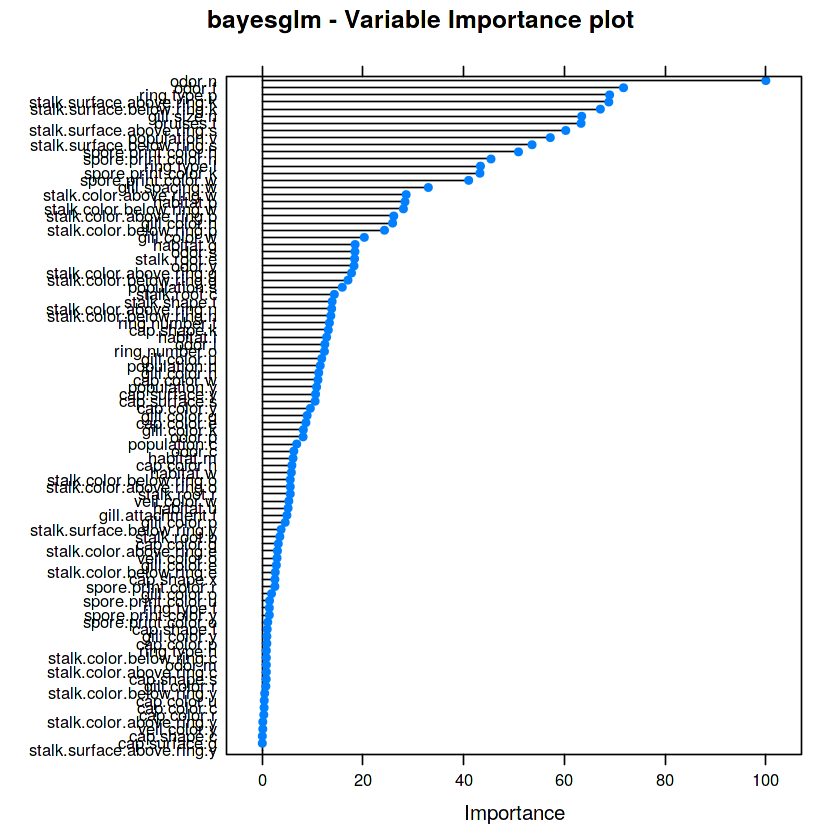

In [71]:
train_cv_9 <- train(x_train1, y_train1, method = "bayesglm", trControl = contrl, tuneLength = 3)
plot(varImp(train_cv_9), main = "bayesglm - Variable Importance plot")
y_pred_9 <- predict(train_cv_9, x_test1)
df1 <- data.frame (Original = y_test1, Predicted = y_pred_9)
confusionMatrix(table(df1$Original, df1$Predicted))

Confusion Matrix and Statistics

   
       e    p
  e 1262    0
  p    0 1175
                                     
               Accuracy : 1          
                 95% CI : (0.9985, 1)
    No Information Rate : 0.5178     
    P-Value [Acc > NIR] : < 2.2e-16  
                                     
                  Kappa : 1          
 Mcnemar's Test P-Value : NA         
                                     
            Sensitivity : 1.0000     
            Specificity : 1.0000     
         Pos Pred Value : 1.0000     
         Neg Pred Value : 1.0000     
             Prevalence : 0.5178     
         Detection Rate : 0.5178     
   Detection Prevalence : 0.5178     
      Balanced Accuracy : 1.0000     
                                     
       'Positive' Class : e          
                                     

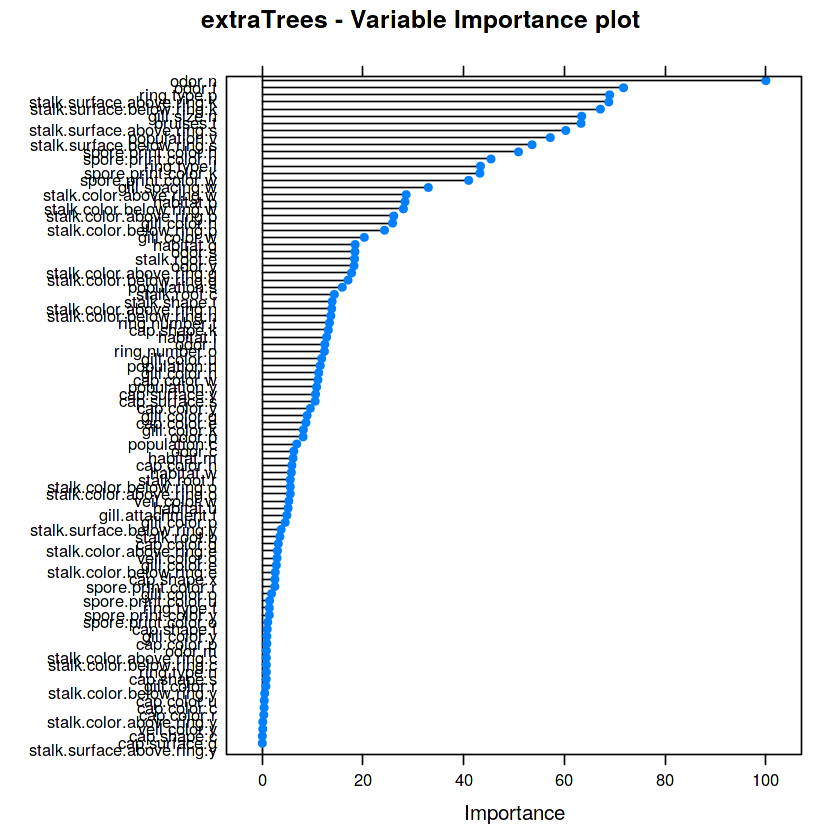

In [74]:
train_cv_11 <- train(x_train1, y_train, method = "extraTrees", trControl = contrl, tuneLength = 3)
plot(varImp(train_cv_11), main = "extraTrees - Variable Importance plot")
y_pred_9 <- predict(train_cv_11, x_test1)
df1 <- data.frame (Original = y_test, Predicted = y_pred_9)
confusionMatrix(table(df1$Original, df1$Predicted))